In [104]:
import pandas as pd
import numpy as np
import random
import math
from tqdm import tqdm

In [105]:
data = pd.read_csv('../data/segment/segmentall.csv')
# feature_columns = ['f2','f3','f8','f14','f15']
feature_columns = [ col for col in data.columns if col not in ['id','target','REGION-PIXEL-COUNT','SHORT-LINE-DENSITY-5','SHORT-LINE-DENSITY-2']]
for col in feature_columns:
    data[col] = pd.qcut(data[col], q=3, labels=False, duplicates='drop')
feature_columns = [ col for col in data.columns if col not in ['id','target']]
print(data[feature_columns].nunique())

REGION-CENTROID-COL     3
REGION-CENTROID-ROW     3
REGION-PIXEL-COUNT      1
SHORT-LINE-DENSITY-5    4
SHORT-LINE-DENSITY-2    3
VEDGE-MEAN              3
VEDGE-SD                3
HEDGE-MEAN              3
HEDGE-SD                3
INTENSITY-MEAN          3
RAWRED-MEAN             3
RAWBLUE-MEAN            3
RAWGREEN-MEAN           3
EXRED-MEAN              3
EXBLUE-MEAN             3
EXGREEN-MEAN            3
VALUE-MEAN              3
SATURATION-MEAN         3
HUE-MEAN                3
dtype: int64


In [106]:
print(feature_columns)
len(feature_columns)

['REGION-CENTROID-COL', 'REGION-CENTROID-ROW', 'REGION-PIXEL-COUNT', 'SHORT-LINE-DENSITY-5', 'SHORT-LINE-DENSITY-2', 'VEDGE-MEAN', 'VEDGE-SD', 'HEDGE-MEAN', 'HEDGE-SD', 'INTENSITY-MEAN', 'RAWRED-MEAN', 'RAWBLUE-MEAN', 'RAWGREEN-MEAN', 'EXRED-MEAN', 'EXBLUE-MEAN', 'EXGREEN-MEAN', 'VALUE-MEAN', 'SATURATION-MEAN', 'HUE-MEAN']


19

In [107]:
def calculate_equivalence_classes(data, condition_attrs):
    # 取出条件属性的列索引
    # 设置条件属性为索引
    # print(condition_attrs)
    data_indexed = data.set_index(condition_attrs)
    # 按照索引分组并将分组内结果合并为列表
    equivalence_classes = data_indexed.groupby(level=condition_attrs)[data.columns[0]].apply(list).to_dict()
    return equivalence_classes

In [108]:
def fitness_function(feature_columns,data,decision_attr):
    # 计算D的信息熵
    total_records = len(data)
    decision_counts = data[decision_attr].value_counts()
    decision_prob = decision_counts / total_records
    entropy_D = -(decision_prob * np.log2(decision_prob)).sum()

    equivalence_classes = calculate_equivalence_classes(data,feature_columns)
    equivalence_classes_dec = calculate_equivalence_classes(data, decision_attr)

    rule_confidences =0
    entropy_DB = 0
    count=0

    for equivalence_class in equivalence_classes.values():
           class_size = len(equivalence_class)
           max=0
           for key_decision in equivalence_classes_dec.keys():
               x=set(equivalence_class).intersection(equivalence_classes_dec.get(key_decision))
               if len(x) / class_size >max:
                   max=len(x)/class_size
           y=1-max
           rule_confidences=rule_confidences+y
           count=count+1

    for equivalence_class in equivalence_classes.values():
        class_size = len(equivalence_class)
        class_prob = class_size / total_records
        for key_decision in equivalence_classes_dec.keys():
            x=set(equivalence_class).intersection(equivalence_classes_dec.get(key_decision))
            if (len(x)>0):
                decision_prob = len(x) / class_size
                entropy_DB -= class_prob * decision_prob * math.log(decision_prob, 2)
    print(entropy_D-entropy_DB)
    avg_confidence = rule_confidences / count+0*(entropy_D-entropy_DB)
    return avg_confidence

In [109]:
feature_columns1=['REGION-CENTROID-COL', 'REGION-CENTROID-ROW', 'REGION-PIXEL-COUNT', 'SHORT-LINE-DENSITY-5', 'SHORT-LINE-DENSITY-2', 'VEDGE-MEAN', 'VEDGE-SD', 'HEDGE-MEAN', 'HEDGE-SD', 'INTENSITY-MEAN', 'RAWRED-MEAN', 'RAWBLUE-MEAN', 'RAWGREEN-MEAN', 'EXRED-MEAN', 'EXBLUE-MEAN', 'EXGREEN-MEAN', 'VALUE-MEAN', 'SATURATION-MEAN', 'HUE-MEAN']
feature_columns2=['REGION-CENTROID-COL', 'REGION-CENTROID-ROW', 'REGION-PIXEL-COUNT', 'SHORT-LINE-DENSITY-5', 'SHORT-LINE-DENSITY-2', 'VEDGE-MEAN', 'VEDGE-SD', 'HEDGE-MEAN', 'HEDGE-SD', 'INTENSITY-MEAN', 'RAWRED-MEAN', 'RAWBLUE-MEAN', 'RAWGREEN-MEAN', 'EXRED-MEAN', 'EXBLUE-MEAN', 'EXGREEN-MEAN', 'VALUE-MEAN']
feature_columns3=['REGION-CENTROID-COL', 'REGION-CENTROID-ROW', 'REGION-PIXEL-COUNT', 'SHORT-LINE-DENSITY-5', 'SHORT-LINE-DENSITY-2', 'VEDGE-MEAN', 'VEDGE-SD', 'HEDGE-MEAN', 'HEDGE-SD', 'INTENSITY-MEAN', 'RAWRED-MEAN', 'RAWBLUE-MEAN', 'RAWGREEN-MEAN', 'EXRED-MEAN', 'EXBLUE-MEAN']
feature_columns4=['REGION-CENTROID-COL', 'REGION-CENTROID-ROW', 'REGION-PIXEL-COUNT', 'SHORT-LINE-DENSITY-5', 'SHORT-LINE-DENSITY-2', 'VEDGE-MEAN', 'VEDGE-SD', 'HEDGE-MEAN', 'HEDGE-SD', 'INTENSITY-MEAN', 'RAWRED-MEAN', 'RAWBLUE-MEAN', 'RAWGREEN-MEAN']
feature_columns5=['REGION-CENTROID-COL', 'REGION-CENTROID-ROW', 'REGION-PIXEL-COUNT', 'SHORT-LINE-DENSITY-5', 'SHORT-LINE-DENSITY-2', 'VEDGE-MEAN', 'VEDGE-SD', 'HEDGE-MEAN', 'HEDGE-SD', 'INTENSITY-MEAN', 'RAWRED-MEAN']
feature_columns6=['REGION-CENTROID-COL', 'REGION-CENTROID-ROW', 'REGION-PIXEL-COUNT', 'SHORT-LINE-DENSITY-5', 'SHORT-LINE-DENSITY-2', 'VEDGE-MEAN', 'VEDGE-SD', 'HEDGE-MEAN', 'HEDGE-SD']
feature_columns7=['REGION-CENTROID-COL', 'REGION-CENTROID-ROW', 'REGION-PIXEL-COUNT', 'SHORT-LINE-DENSITY-5', 'SHORT-LINE-DENSITY-2', 'VEDGE-MEAN', 'VEDGE-SD']
feature_columns8=['REGION-CENTROID-COL', 'REGION-CENTROID-ROW', 'REGION-PIXEL-COUNT', 'SHORT-LINE-DENSITY-5', 'SHORT-LINE-DENSITY-2']
feature_columns9=['REGION-CENTROID-COL', 'REGION-CENTROID-ROW', 'REGION-PIXEL-COUNT']
feature_columns10=['REGION-CENTROID-COL']

print(fitness_function(feature_columns10,data,'target'))

0.07680991745516463
0.7870953718121744


In [110]:
a=[0. , 0.1 ,0.2, 0.3, 0.4, 0.5 ,0.6 ,0.7 ,0.8, 0.9 ,1. ]
b=[]
x=0.7870953718121744
y=0.07680991745516463
for i in a:
    b.append(x + i * y)
print(b)

[0.7870953718121744, 0.7947763635576909, 0.8024573553032073, 0.8101383470487238, 0.8178193387942402, 0.8255003305397567, 0.8331813222852732, 0.8408623140307896, 0.8485433057763061, 0.8562242975218225, 0.863905289267339]


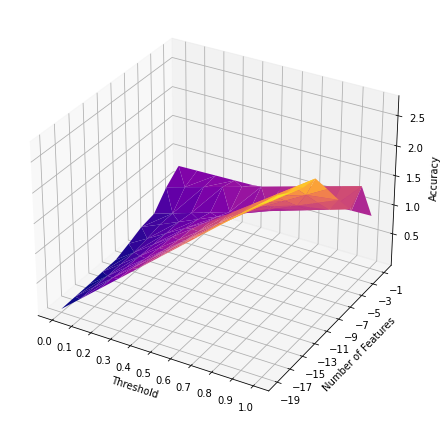

In [11]:
import matplotlib.pyplot as plt
import numpy as np

# Create data
x = [0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1]
y = [-1,-3,-5,-7,-9,-11,-13,-15,-17,-19]
X, Y = np.meshgrid(x, y)
data=np.array([
    [0.7870953718121744, 0.7947763635576909, 0.8024573553032073, 0.8101383470487238, 0.8178193387942402, 0.8255003305397567, 0.8331813222852732, 0.8408623140307896, 0.8485433057763061, 0.8562242975218225, 0.863905289267339],
    [0.5879838587465948, 0.6845010104276076, 0.7810181621086204, 0.8775353137896331, 0.974052465470646, 1.0705696171516588, 1.1670867688326716, 1.2636039205136842, 1.3601210721946972, 1.4566382238757098, 1.553155375556723],
    [0.3000334877660687, 0.405270767870863, 0.5105080479756574, 0.6157453280804517, 0.7209826081852461, 0.8262198882900404, 0.9314571683948347, 1.036694448499629, 1.1419317286044235, 1.2471690087092178, 1.352406288814012],
    [0.2531735480911888, 0.39708448363624094, 0.5409954191812931, 0.6849063547263452, 0.8288172902713975, 0.9727282258164496, 1.1166391613615017, 1.2605500969065537, 1.404461032451606, 1.548371967996658, 1.6922829035417102],
    [0.14950943559538304, 0.33986172410403176, 0.5302140126126804, 0.7205663011213292, 0.9109185896299778, 1.1012708781386267, 1.2916231666472753, 1.4819754551559239, 1.6723277436645727, 1.8626800321732215, 2.0530323206818704],
    [0.058131250522830184, 0.29297883515188594, 0.5278264197809417, 0.7626740044099973, 0.9975215890390532, 1.2323691736681088, 1.4672167582971645, 1.70206434292622, 1.9369119275552762, 2.1717595121843316, 2.4066070968133872],
    [0.04668664667242963, 0.28616731125214784, 0.5256479758318661, 0.7651286404115841, 1.0046093049913025, 1.2440899695710206, 1.4835706341507386, 1.723051298730457, 1.9625319633101752, 2.2020126278898933, 2.4414932924696116],
    [0.02465889609212754, 0.27708101128781526, 0.5295031264835031, 0.7819252416791906, 1.0343473568748784, 1.286769472070566, 1.5391915872662536, 1.7916137024619414, 2.0440358176576297, 2.296457932853317, 2.548880048049005],
[0.014811882312738396, 0.28226564532833864, 0.549719408343939, 0.8171731713595392, 1.0846269343751394, 1.3520806973907395, 1.6195344604063397, 1.88698822342194, 2.1544419864375404, 2.4218957494531406, 2.6893495124687408],
[0.004754275373305498, 0.2811542836510743, 0.5575542919288432, 0.8339543002066119, 1.1103543084843808, 1.3867543167621494, 1.6631543250399181, 1.939554333317687, 2.2159543415954563, 2.492354349873225, 2.7687543581509937]

])

fig = plt.figure(figsize=(6,6))  # Set the size of the figure in inches
ax = fig.add_subplot(111, projection='3d')
ax.plot_trisurf(X.flatten(), Y.flatten(), data.flatten(), cmap='plasma')

# Set the axis labels
ax.set_xlabel('Threshold')
ax.set_ylabel('Number of Features')
ax.set_zlabel('Accuracy')

# Customize the tick labels
x_ticks = [0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1]
y_ticks = [-1,-3,-5,-7,-9,-11,-13,-15,-17,-19]

ax.set_xticks(x_ticks)
ax.set_yticks(y_ticks)

# Save the plot in IEEE format
plt.tight_layout()
plt.savefig('test2.png', bbox_inches='tight',dpi=300)

# Show the plot in the console
plt.show()
